# Problem Statement

#### Customer retention is as crucial as customer acquisition when it comes to increasing revenue. Also we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company. Also churn prediction allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible so we have 3 tasks:

1.Analyze the customer churn rate for bank because  it is    useful to understand why the customers leave.

2.Predictive behavior modeling i.e. to classify if a customer is going to churn or not.

3.Choose the most reliable model that will attach a probability to the churn to make it easier for customer service to target right customer in order to minimize their efforts to prevent churn.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier



%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

# Importing The Data

In [2]:
df=pd.read_csv('churn.csv')

# Understanding the Dataset

In [3]:
#checking the shape of dataset
df.shape

(10000, 14)

In [36]:
#checking how does data looks from top
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age1
0,619,France,Female,2,0.00,1,1,1,101348.88,1,3.737670
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,0,3.713572
2,502,France,Female,8,159660.80,3,1,0,113931.57,1,3.737670
3,699,France,Female,1,0.00,2,0,0,93826.63,0,3.663562
4,850,Spain,Female,2,125510.82,1,1,1,79084.10,0,3.761200


In [5]:
#checking how does data looks from bottom
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
#what type of columns do we have?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#How many unique values do we have in data?
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
#checking if there is any null values in our dataset
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#checking if we have any duplicate values in dataset?
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [10]:
#checking the descriptive summary numerical columns
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
#checking the descriptive summary categorical columns
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# Pre Processing Of Data

### Dropping Insignificant Columns

In [12]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

#### Converting Estimated Salary into Bins

In [15]:
conditions = [
    (df['EstimatedSalary'] <= 25000),
    (df['EstimatedSalary'] > 25000) & (df['EstimatedSalary'] <= 50000),
    (df['EstimatedSalary'] > 50000) & (df['EstimatedSalary'] <= 75000),
    (df['EstimatedSalary'] > 75000) & (df['EstimatedSalary'] <= 100000),
    (df['EstimatedSalary'] > 100000) & (df['EstimatedSalary'] <= 125000),
    (df['EstimatedSalary'] > 125000) & (df['EstimatedSalary'] <= 150000),
    (df['EstimatedSalary'] > 150000) & (df['EstimatedSalary'] <= 1750000),
    (df['EstimatedSalary'] > 175000) & (df['EstimatedSalary'] <= 200000)
]

values = ['Less than 25000', '25,000-50,000','50,000-75,000','75,000-1,00,000','1,00,000-1,25,000','1,25,000-1,50,000',
          '1,50,000-1,75,000','1,75,000-2,00,000'  ]

df['SalaryRange'] = np.select(conditions, values)

In [16]:
df['SalaryRange'].value_counts()

1,50,000-1,75,000    2455
1,25,000-1,50,000    1279
1,00,000-1,25,000    1276
50,000-75,000        1269
75,000-1,00,000      1268
25,000-50,000        1236
Less than 25000      1217
Name: SalaryRange, dtype: int64

#### Converting to age columns into Bins for (EDA)

In [17]:
conditions = [
    (df['Age'] >= 0) & (df['Age'] <= 18),
    (df['Age'] >= 18) & (df['Age'] < 30),
    (df['Age'] >= 30) & (df['Age'] < 40),
    (df['Age'] >= 40) & (df['Age'] < 50),
    (df['Age'] >= 50) & (df['Age'] < 60),
    (df['Age'] >= 60)
]

values = ['Minors', '18-30', '30-40','40-50','50-60','>60']

df['AgeGroup'] = np.select(conditions, values)

In [18]:
df['AgeGroup'].value_counts()

30-40     4346
40-50     2618
18-30     1619
50-60      869
>60        526
Minors      22
Name: AgeGroup, dtype: int64

# Univariate Analysis

# CountPlot

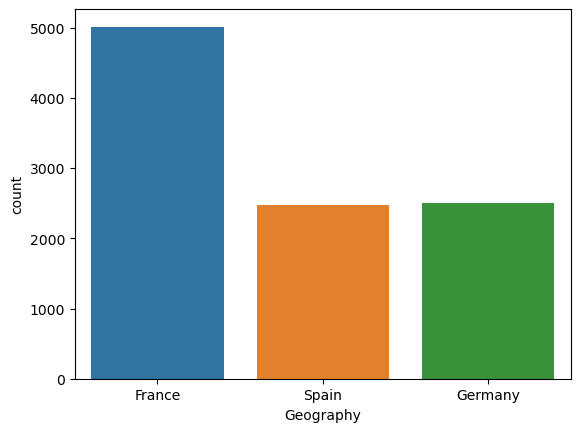

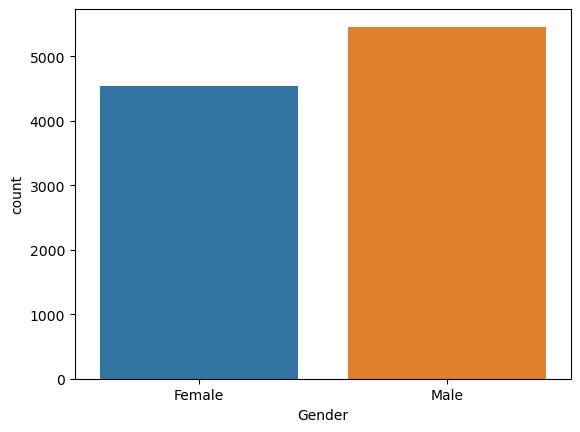

In [37]:
#countplot:
for col in df.select_dtypes(include='object'):
    sns.countplot(data=df.select_dtypes(include='object'),x=col)
    plt.show()

# Inference

1.Most people are from France

2.Most of the people are Male who are using bank service

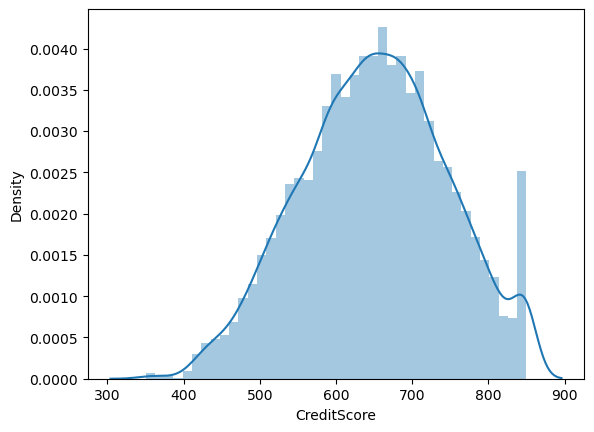

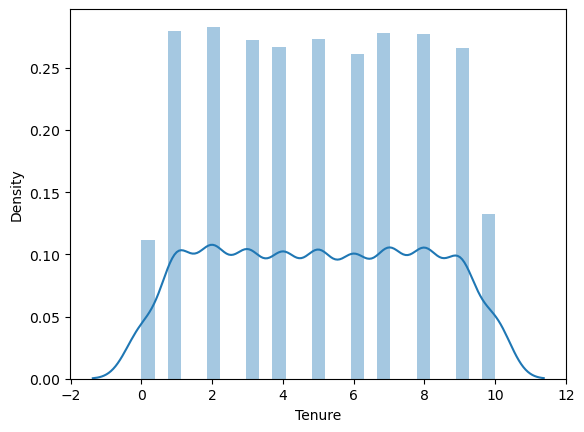

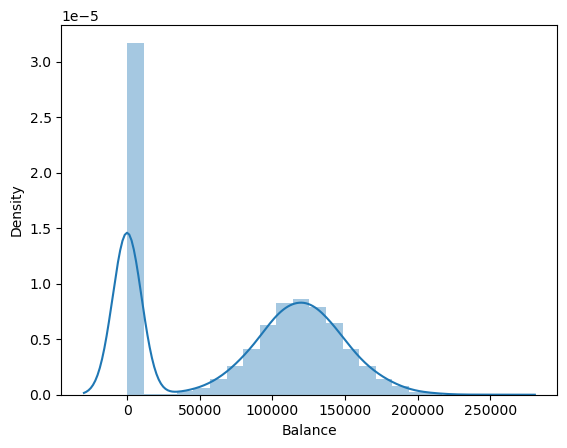

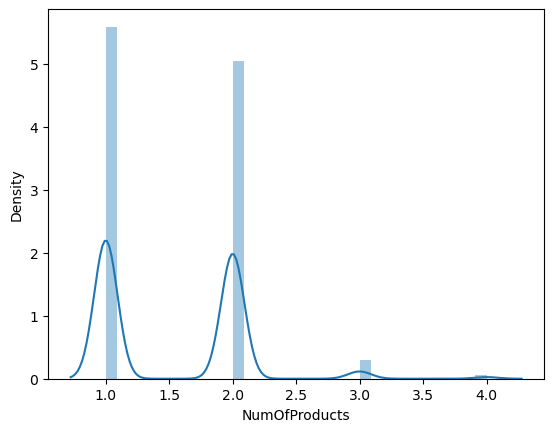

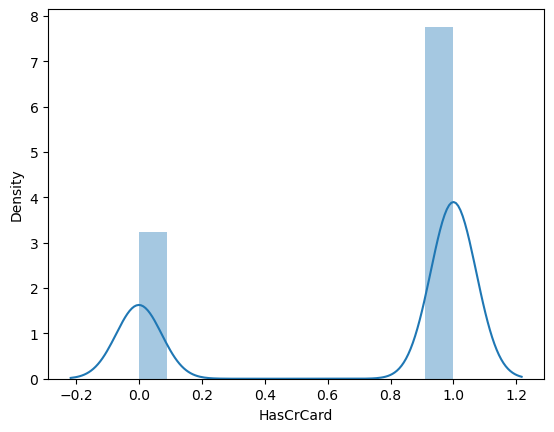

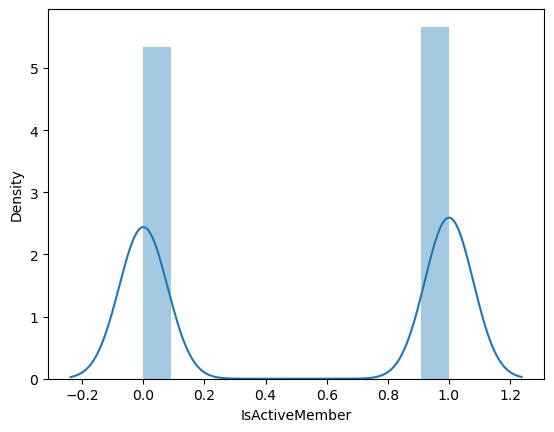

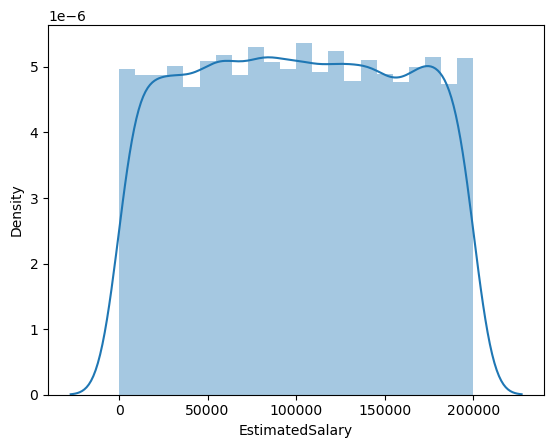

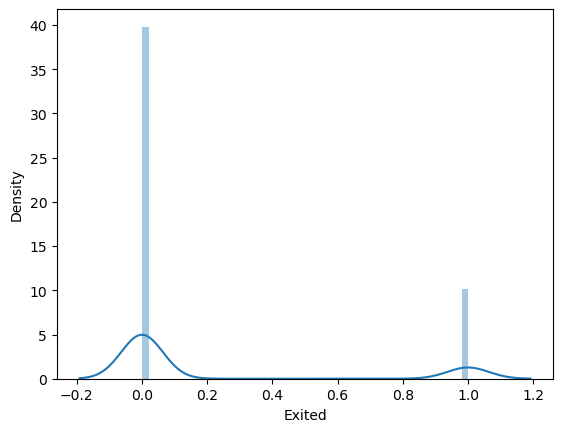

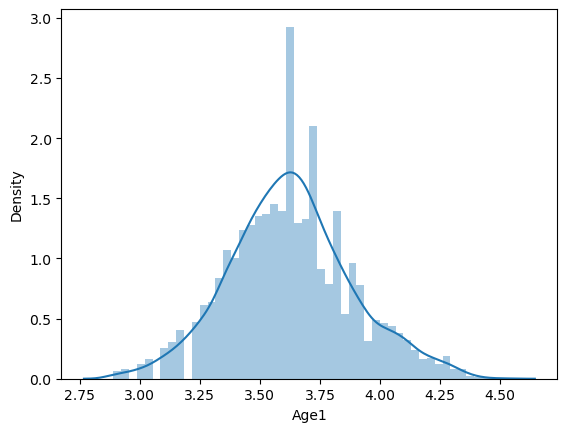

In [38]:
#Distribution plot of all continuos preedictors:
for col in df.select_dtypes(include='number'):
    sns.distplot(a=df[col])
    plt.show()

## Inference

1.Hascard,Tenure,Exited,isactivemember,numberofproducts are categorical columns



In [20]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

# Transformation to handle Skewed Data

<Figure size 6000x10000 with 0 Axes>

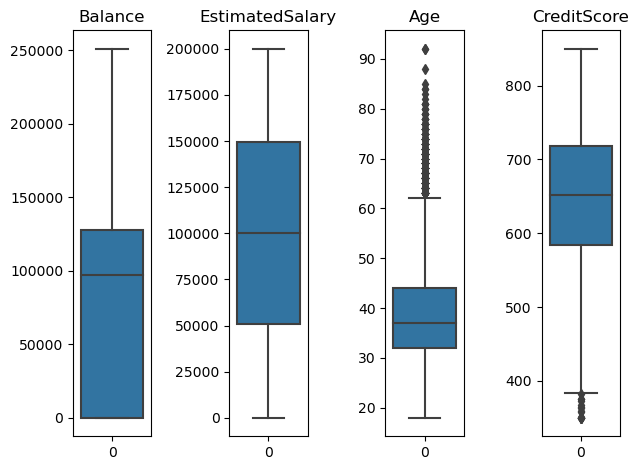

In [19]:
plt.figure(figsize=(60, 100))
# Store the list of columns
columns_to_plot = ['Balance', 'EstimatedSalary', 'Age', 'CreditScore']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df[column], ax=axis) 
        axis.set_title(column)

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
#log transformation of of skewed data
df['Age1']=np.log(df['Age'])

<AxesSubplot:xlabel='Age1'>

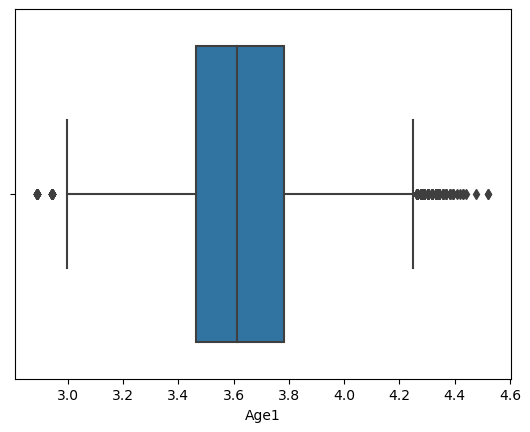

In [22]:
#After log transformation
sns.boxplot(x=df['Age1'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

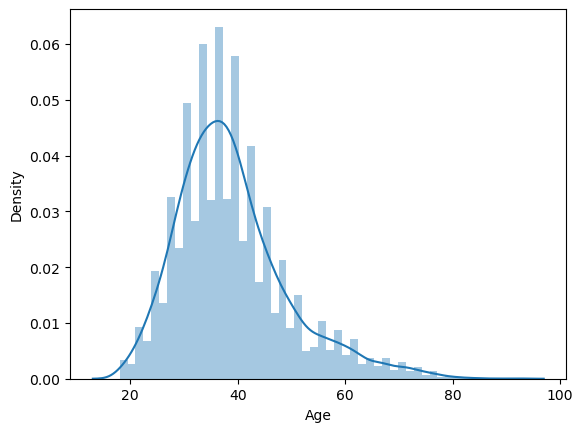

In [23]:
sns.distplot(df['Age'], bins=None, hist=True, kde=True, rug=False, fit=None,  
             vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

# Bivariate Analysis

### Checking Correlation

# Feature Selection 

In [40]:
df.corr()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age1
CreditScore,1.000000,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.006507
Tenure,0.000842,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.011199
Balance,0.006268,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.030598
NumOfProducts,0.012238,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.030025
HasCrCard,-0.005458,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.011659
IsActiveMember,0.025651,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.064891
EstimatedSalary,-0.001384,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.006253
Exited,-0.027094,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.294082
Age1,-0.006507,-0.011199,0.030598,-0.030025,-0.011659,0.064891,-0.006253,0.294082,1.000000


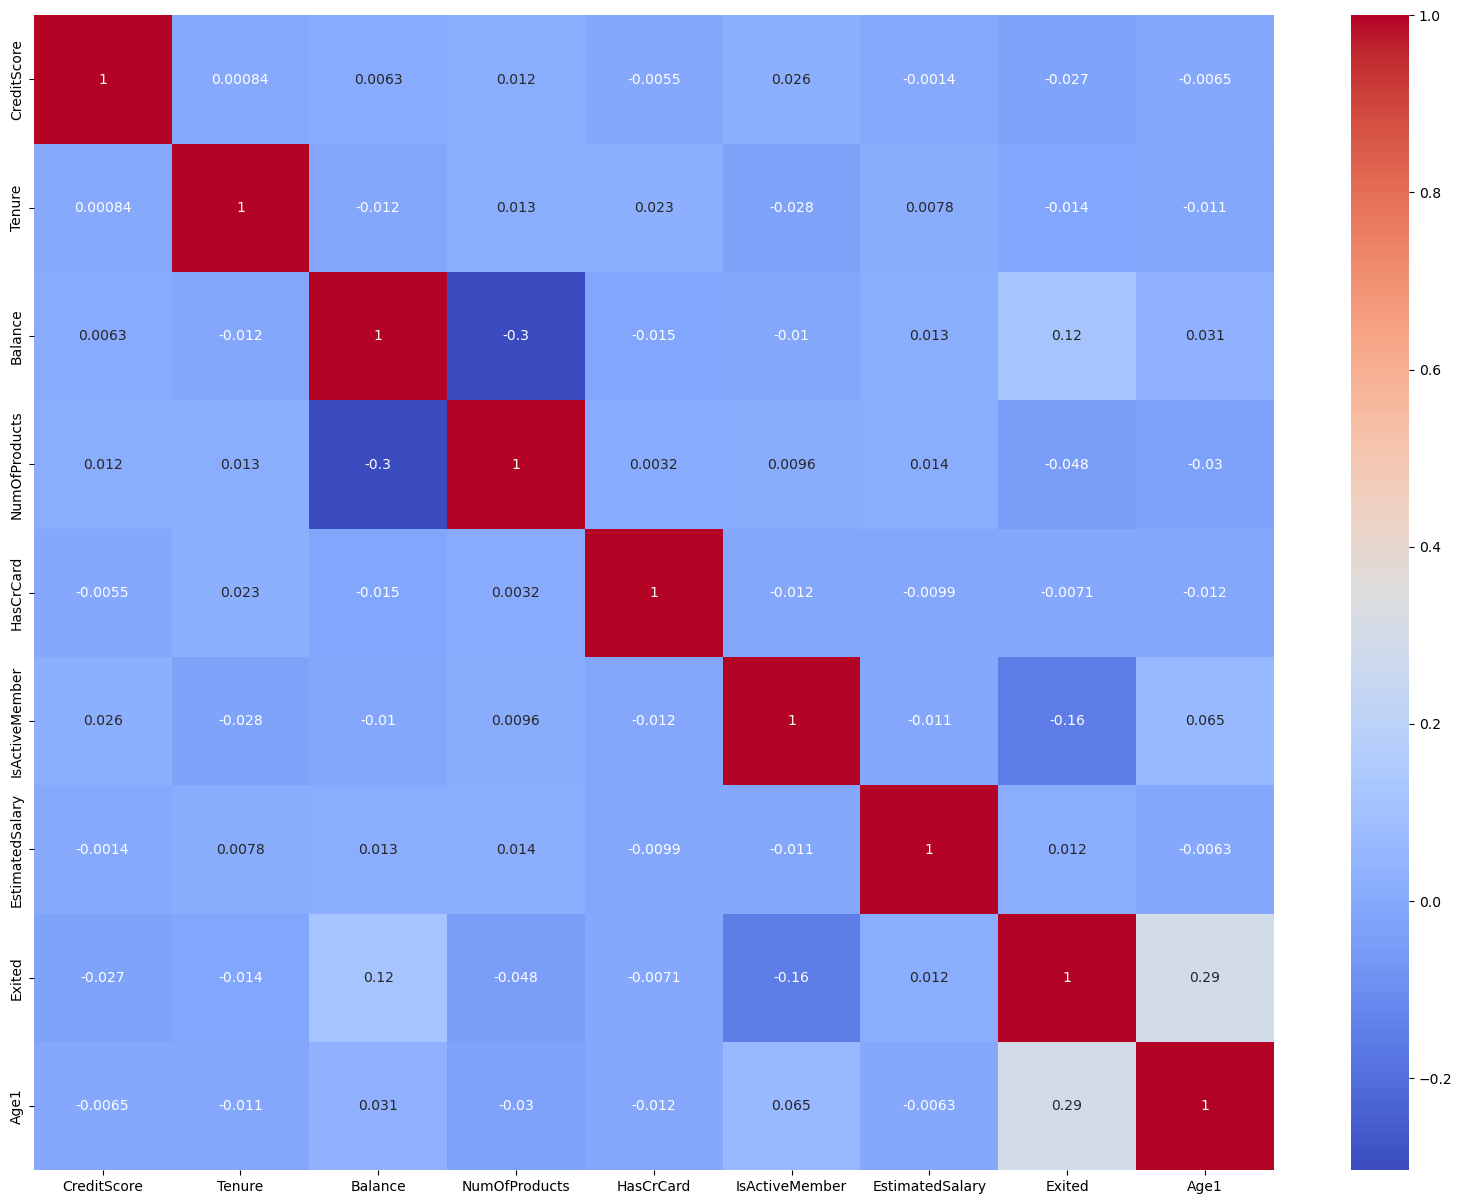

In [41]:
#correlation heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),yticklabels=True,cbar=True,cmap='coolwarm',annot=True)
plt.show()

No two columns show a correlation greater than 0.75. So as theoretically suggested, we are good to go here.

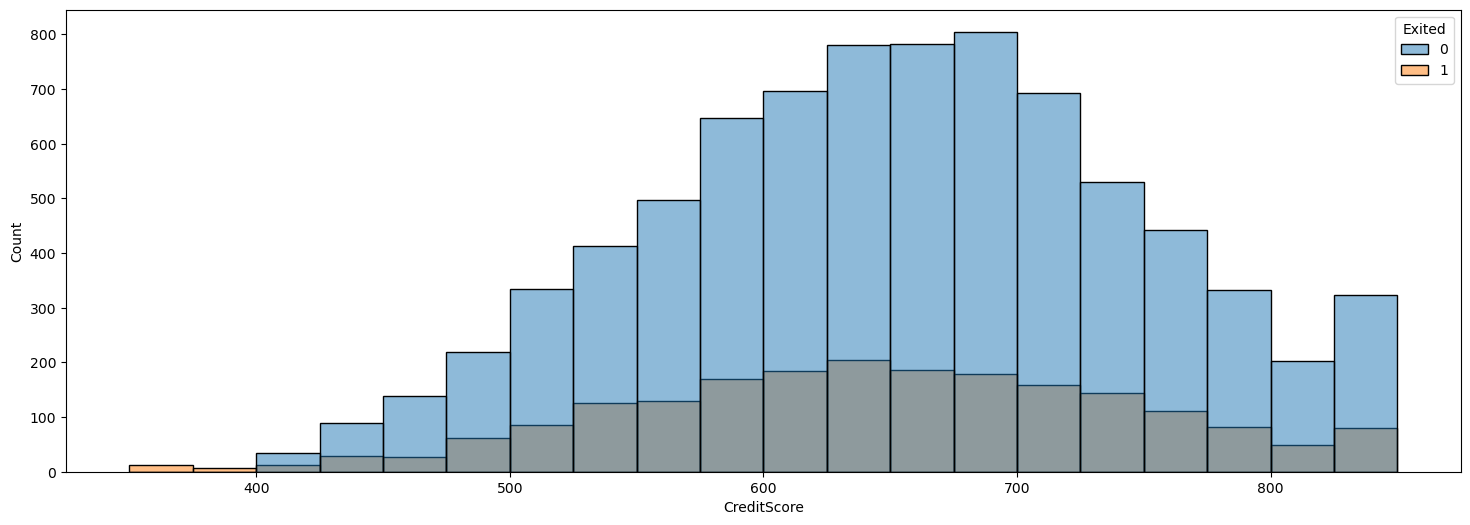

In [30]:
plt.figure(figsize=(18,6))
sns.histplot(data=df,x='CreditScore',bins=20,hue='Exited')
plt.show()

inference:

There is no significant difference in the credit score distribution between retained and churned customers.

#### Dropping the columns formed for Eda which are no longer needed

In [31]:
# Drop the columns formed for EDA as it's no longer needed. Also drop age and keep logarithmic values instead(age1)

df.drop(columns=['SalaryRange','AgeGroup','Age'],inplace=True)

## Target check for balanced or Imbalanced data

In [32]:
round(df['Exited'].value_counts()/len(df)*100,2)

0    79.63
1    20.37
Name: Exited, dtype: float64

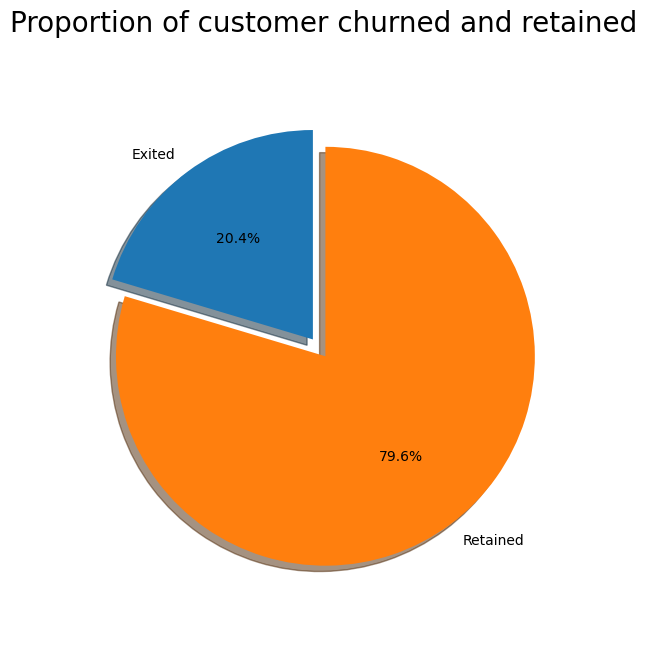

In [33]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6 , 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

Inference:

We can see the proprtion of people who churned and retained

#### 80 percent of the data belongs to retained class .It is Imbalanced data .

#### Solution : Use SMOTE to handle this or the Precision -Recall curve should be used not accuracy .

# Predictive Modeling

About 20% of the customers have churned. We need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

# Selecting Features and Label

In [34]:
X= df.drop('Exited',axis=1)
y = df['Exited']

## Encoding and Scaling

In [35]:
#Segregating Numerical and categorical columns

#segregating the categorical columns
categorical_cols=X.select_dtypes(include=['object', 'category'])
print("categorical columns are :")
print(categorical_cols.columns)

#segregating the numerical columns
numerical_cols=X.select_dtypes(include='number')
print("Numerical columns are :")
print(numerical_cols.columns)

categorical columns are :
Index(['Geography', 'Gender'], dtype='object')
Numerical columns are :
Index(['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Age1'],
      dtype='object')


### Scaling the Numerical columns

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(numerical_cols)
X_scaled = pd.DataFrame(X_scaled,columns=scaler.get_feature_names_out())

In [64]:
X_scaled.head(2)

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age1
0,0.538,0.2,0.000000,0.0,1.0,1.0,0.506735,0.519363
1,0.516,0.1,0.334031,0.0,0.0,1.0,0.562709,0.504592


## Encoding the Categorical columns

In [65]:
ohe = OneHotEncoder(drop='first')
ohe.fit_transform(categorical_cols).toarray()

#assigning a dataframe to encoded features
df_ohe=pd.DataFrame(ohe.fit_transform(categorical_cols).toarray(),columns=ohe.get_feature_names_out())
print('df_ohe firest 5 rows :')
print(df_ohe.head(2))

#checking the shape of two dataFrames
print(f'Shape of Encoded Categorical Dataframe is : {df_ohe.shape}')
print(f'Shape of Numerical Dataframe is : {numerical_cols.shape}')

df_ohe firest 5 rows :
   Geography_Germany  Geography_Spain  Gender_Male
0                0.0              0.0          0.0
1                0.0              1.0          0.0
Shape of Encoded Categorical Dataframe is : (10000, 3)
Shape of Numerical Dataframe is : (10000, 8)


### Concating Numerical and Categorical Dataframe

In [66]:
#concatinating the encoded categorical and numerical columns into a new dataframe
df_concat=pd.concat([df_ohe,X_scaled],axis=1)
print(f'Shape of Concatetaned data frame is :')
print(df_concat.shape)

Shape of Concatetaned data frame is :
(10000, 11)


In [67]:
df_concat.head(5)

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age1
0,0.0,0.0,0.0,0.538,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.519363
1,0.0,1.0,0.0,0.516,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.504592
2,0.0,0.0,0.0,0.304,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.519363
3,0.0,0.0,0.0,0.698,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.473938
4,0.0,1.0,0.0,1.000,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.533787


In [68]:
len(df['Exited']),df_concat.shape

(10000, (10000, 11))

In [69]:
df_concat.head(2)

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age1
0,0.0,0.0,0.0,0.538,0.2,0.000000,0.0,1.0,1.0,0.506735,0.519363
1,0.0,1.0,0.0,0.516,0.1,0.334031,0.0,0.0,1.0,0.562709,0.504592


In [70]:
df_concat.columns

Index(['Geography_Germany', 'Geography_Spain', 'Gender_Male', 'CreditScore',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Age1'],
      dtype='object')

## Smote

In [71]:
from imblearn.over_sampling import SMOTE
# Create an instance of SMOTE
smote = SMOTE()

# Generate the synthetic samples
X_resampled, y_resampled = smote.fit_resample(df_concat, y)

# Convert the resampled data to a pandas DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=df_concat.columns)

# Print the class distribution before and after SMOTE
original_class_distribution = np.bincount(y)
resampled_class_distribution = np.bincount(y_resampled)

print("Class distribution before SMOTE:", original_class_distribution)
print("Class distribution after SMOTE:", resampled_class_distribution)


Class distribution before SMOTE: [7963 2037]
Class distribution after SMOTE: [7963 7963]


# Splitting the dataset into Training and test Dataset

In [72]:
y_resampled.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [73]:
X= resampled_df
y =y_resampled

In [74]:
X.columns

Index(['Geography_Germany', 'Geography_Spain', 'Gender_Male', 'CreditScore',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Age1'],
      dtype='object')

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)

Shape of X_train: (11148, 11)
Shape of y_train: (11148,)
Shape of X_test: (4778, 11)
Shape of y_test: (4778,)


In [76]:
import statsmodels.api as sm

# Add a constant column to X
X_train= sm.add_constant(X_train)

# Create a logistic regression model
logit_model = sm.Logit(y_train, X_train)

# Fit the model
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.560189
         Iterations 6


In [77]:
# Print the model summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                11148
Model:                          Logit   Df Residuals:                    11136
Method:                           MLE   Df Model:                           11
Date:                Fri, 25 Aug 2023   Pseudo R-squ.:                  0.1918
Time:                        17:50:02   Log-Likelihood:                -6245.0
converged:                       True   LL-Null:                       -7727.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.5938      0.135    -19.175      0.000      -2.859      -2.329
Geography_Germany     0.8318      0.056     14.965      0.000       0.723       0.941
Geography_Spain       0.0553      0.055      1.007      0.314      -0.052       0.163
Gender_Male          -0.5908      0.044    -13.519      0.000      -0.676      -0.505
CreditScore          -0.3173      0.118     -2.699      0.007      -0.548      -0.087
Tenure               -0.0701      0.077     -0.912      0.362      -0.221       0.081
Balance               0.5862      0.100      5.845      0.000       0.390       0.783
NumOfProducts        -0.4484      0.100     -4.470      0.000      -0.645      -0.252
HasCrCard            -0.0022      0.048     -0.046      0.964      -0.096       0.092
IsActiveMember       -0.9178      0.044    -20.699      0.000      -1.005      -0.831
EstimatedSalary       0.1436      0.078      1.848      0.065      -0.009       0.296
Age1                  6.2941      0.166     37.847      0.000       5.968       6.620
=====================================================================================
"""

##### Inference
Geography_spain,Tenure,HasCrCard, EstimatedSalary are insignificent. Therefore we, will drop it

In [78]:
X=X[['Geography_Germany',  'Gender_Male', 'CreditScore',
        'Balance', 'NumOfProducts', 'IsActiveMember',
        'Age1']]
y=y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)


# Add a constant column to X
X_train= sm.add_constant(X_train)

# Create a logistic regression model
logit_model = sm.Logit(y_train, X_train)

# Fit the model
result=logit_model.fit()

Shape of X_train: (11148, 7)
Shape of y_train: (11148,)
Shape of X_test: (4778, 7)
Shape of y_test: (4778,)
Optimization terminated successfully.
         Current function value: 0.560423
         Iterations 6


In [79]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                11148
Model:                          Logit   Df Residuals:                    11140
Method:                           MLE   Df Model:                            7
Date:                Fri, 25 Aug 2023   Pseudo R-squ.:                  0.1915
Time:                        17:50:03   Log-Likelihood:                -6247.6
converged:                       True   LL-Null:                       -7727.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.5389      0.117    -21.703      0.000      -2.768      -2.310
Geography_Germany     0.8126      0.053     15.437      0.000       0.709       0.916
Gender_Male          -0.5911      0.044    -13.535      0.000      -0.677      -0.506
CreditScore          -0.3213      0.117     -2.736      0.006      -0.552      -0.091
Balance               0.5861      0.100      5.850      0.000       0.390       0.782
NumOfProducts        -0.4451      0.100     -4.441      0.000      -0.642      -0.249
IsActiveMember       -0.9192      0.044    -20.755      0.000      -1.006      -0.832
Age1                  6.2984      0.166     37.878      0.000       5.972       6.624
=====================================================================================
"""

#### Inference
I have removed all the insignifecnet fewatures and now I will build the model by usint the significent features


# Predictive Modeling

# Logistic Model

In [80]:
X=X[['Geography_Germany',  'Gender_Male', 'CreditScore',
        'Balance', 'NumOfProducts', 'IsActiveMember',
        'Age1']]
y=y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)
logmodel=LogisticRegression() #calling the Logistic Regression model
logmodel.fit(X_train,y_train)
# Predict the target variable for train and test sets
y_train_pred = logmodel.predict(X_train)
y_test_pred = logmodel.predict(X_test)

# Calculate precision, recall, F1 score, and AUC score on train set
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)

# Calculate precision, recall, F1 score, and AUC score on test set
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc_log = roc_auc_score(y_test, y_test_pred)

# Calculate confusion matrix for train and test sets
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1)
print("Train AUC Score:", train_auc)

print("Train Confusion Matrix:")
print(train_cm)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)
print("Test AUC Score:", test_auc_log)
print("Test Confusion Matrix:")
print(test_cm)

Shape of X_train: (11148, 7)
Shape of y_train: (11148,)
Shape of X_test: (4778, 7)
Shape of y_test: (4778,)
Train Precision: 0.713855421686747
Train Recall: 0.7220430107526882
Train F1 Score: 0.7179258731290092
Train AUC Score: 0.7159963616981833
Train Confusion Matrix:
[[3953 1615]
 [1551 4029]]
Test Precision: 0.7217792698279479
Test Recall: 0.7217792698279479
Test F1 Score: 0.7217792698279479
Test AUC Score: 0.7224762737448717
Test Confusion Matrix:
[[1732  663]
 [ 663 1720]]


# Confusion MAtrix

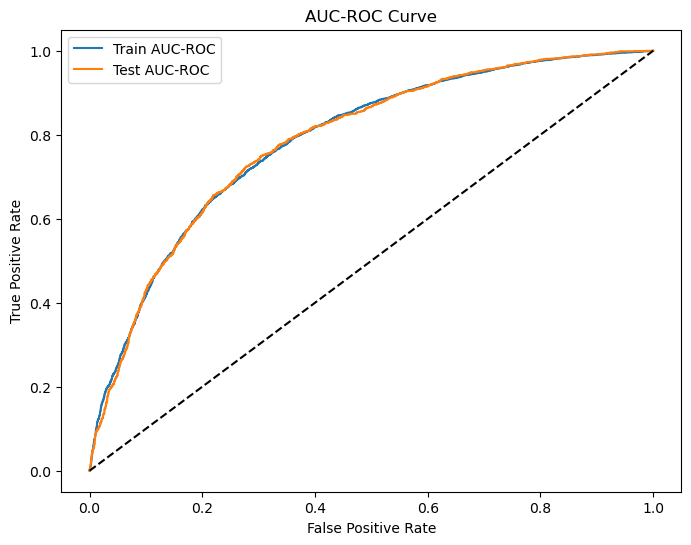

In [81]:
y_train_prob = logmodel.predict_proba(X_train)[:, 1]
y_test_prob = logmodel.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

# Plot the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train AUC-ROC')
plt.plot(fpr_test, tpr_test, label='Test AUC-ROC')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

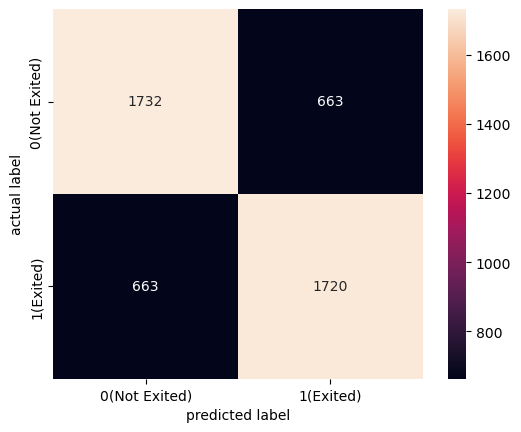

In [82]:
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [83]:
# for 0 and 1 classes
logmodel.predict_proba(X_test)[:1]

array([[0.93, 0.07]])

In [84]:
#AUC for training dataset
auc_test = roc_auc_score(y_test,y_test_pred)
auc_test

0.7224762737448717

# Knn Model

### Scaling the Dataset

In [209]:

X=X[['Geography_Germany',  'Gender_Male', 'CreditScore',
        'Balance', 'NumOfProducts', 'IsActiveMember',
        'Age1']]
y=y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)

Shape of X_train: (11148, 7)
Shape of y_train: (11148,)
Shape of X_test: (4778, 7)
Shape of y_test: (4778,)


In [210]:
X_train

,Geography_Germany,Gender_Male,CreditScore,Balance,NumOfProducts,IsActiveMember,Age1
2255,0.0,1.0,0.256000,0.000000,0.333333,1.0,0.533787
6181,0.0,1.0,0.440000,0.516843,0.333333,0.0,0.473938
6724,0.0,0.0,0.804000,0.000000,0.333333,0.0,0.504592
12339,0.0,0.0,0.567841,0.617625,0.000000,1.0,0.542520
13157,0.0,1.0,0.522129,0.001431,0.000000,1.0,0.409570
...,...,...,...,...,...,...,...
11633,0.0,0.0,0.553096,0.000000,0.509422,1.0,0.432929
1344,1.0,0.0,0.220000,0.476319,0.333333,0.0,0.489457
12815,0.0,0.0,0.659600,0.000000,0.333333,1.0,0.523720
7293,0.0,0.0,0.718000,0.445080,0.000000,0.0,0.389838


In [85]:
knn_model=KNeighborsClassifier(n_neighbors=12)

#Fitting the model
knn_model.fit(X_train,y_train)

#predicting for train Data set
y_train_pred=knn_model.predict(X_train)

#Confusion Matrix for training set
print('Confusion Matrix for X_train')
print(confusion_matrix(y_train,y_train_pred))

# Evaluate the model's performance for training dataset
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
precision_train = metrics.precision_score(y_train, y_train_pred)
recall_train= metrics.recall_score(y_train, y_train_pred)
f1_score_train = metrics.f1_score(y_train, y_train_pred)
print("Accuracy_train:", accuracy_train)
print("Precision_train:", precision_train)
print("Recall_train:", recall_train)
print("F1 Score_train:", f1_score_train)

#AUC for training dataset
auc_train_knn = roc_auc_score(y_train,y_train_pred)
print('AUC Train : ', auc_train_knn)


#predicting for test Data set
y_test_pred=knn_model.predict(X_test)

#Confusion Matrix for test set
print('Confusion Matrix for X_test :')
print(confusion_matrix(y_test,y_test_pred))

# Evaluate the model's performance for test dataset
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
f1_score_test = metrics.f1_score(y_test, y_test_pred)
print("Accuracy_test:", accuracy_test)
print("Precision_test:", precision_test)
print("Recall_test:", recall_test)
print("F1 Score_test:", f1_score_test)

#AUC for test dataset
auc_test_knn = roc_auc_score(y_test,y_test_pred)
print('AUC Test : ', auc_test_knn)

Confusion Matrix for X_train
[[4773  795]
 [1040 4540]]
Accuracy_train: 0.8353964836742016
Precision_train: 0.8509840674789129
Recall_train: 0.8136200716845878
F1 Score_train: 0.831882730187815
AUC Train :  0.8354199496353973
Confusion Matrix for X_test :
[[1976  419]
 [ 517 1866]]
Accuracy_test: 0.8041021347844286
Precision_test: 0.8166301969365427
Recall_test: 0.7830465799412505
F1 Score_test: 0.7994858611825193
AUC Test :  0.8040493860040282


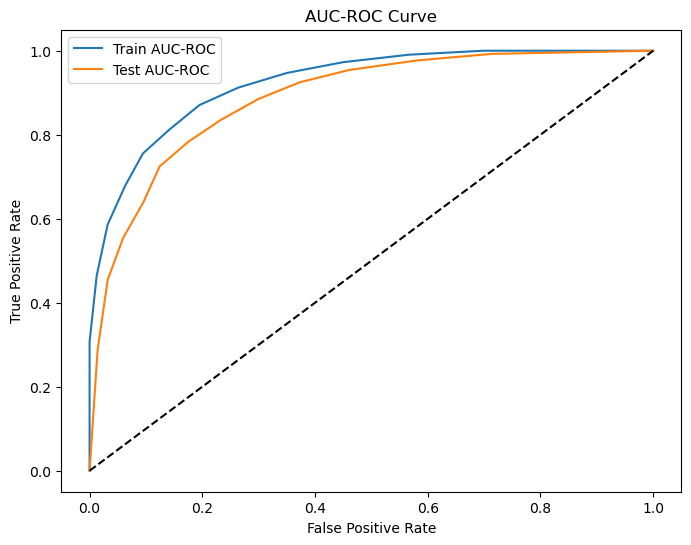

In [86]:
# Predicting probabilities for positive class
y_train_prob = knn_model.predict_proba(X_train)[:, 1]
y_test_prob = knn_model.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

# Plot the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train AUC-ROC')
plt.plot(fpr_test, tpr_test, label='Test AUC-ROC')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

# Descision Tree

In [87]:

X=X[['Geography_Germany',  'Gender_Male', 'CreditScore',
        'Balance', 'NumOfProducts', 'IsActiveMember',
        'Age1']]
y=y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)

Shape of X_train: (11148, 7)
Shape of y_train: (11148,)
Shape of X_test: (4778, 7)
Shape of y_test: (4778,)


In [89]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [10 ,20,21,30],  # Maximum depth of the tree
    'min_samples_split': [15,16,19,21],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [8,10,15,20], # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Create an instance of the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_dt = grid_search.best_params_
best_score_dt = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params_dt)
print("Best Score:", best_score_dt)

# Use the best parameters to create a new Decision Tree classifier
best_dt_classifier = DecisionTreeClassifier(**best_params_dt)

# Fit the classifier to the training data
best_dt_classifier.fit(X_train, y_train)

# Predict probabilities on the training and test data
y_train_prob = best_dt_classifier.predict_proba(X_train)[:, 1]
y_test_prob = best_dt_classifier.predict_proba(X_test)[:, 1]

# Calculate the AUC score on the training and test data
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Calculate accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1 score for train set
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate precision, recall, and F1 score for test set
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate AUC score for train and test sets
y_train_prob = best_dt_classifier.predict_proba(X_train)[:, 1]
y_test_prob = best_dt_classifier.predict_proba(X_test)[:, 1]
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc_dt = roc_auc_score(y_test, y_test_prob)

# Calculate confusion matrix for train and test sets
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Print the results
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1)
print("Train AUC Score:", train_auc)
print("Train Confusion Matrix:")
print(train_confusion_matrix)

print("\nTest Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)
print("Test AUC Score:", test_auc_dt)
print("Test Confusion Matrix:")
print(test_confusion_matrix)

# Print the AUC scores
print("Train AUC:", train_auc)
print("Test AUC:", test_auc_dt)

Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 21}
Best Score: 0.8295654710531981
Train Accuracy: 0.8353964836742016
Train Precision: 0.8509840674789129
Train Recall: 0.8136200716845878
Train F1 Score: 0.831882730187815
Train AUC Score: 0.9665137672259301
Train Confusion Matrix:
[[4773  795]
 [1040 4540]]

Test Accuracy: 0.8041021347844286
Test Precision: 0.8166301969365427
Test Recall: 0.7830465799412505
Test F1 Score: 0.7994858611825193
Test AUC Score: 0.9063185910638771
Test Confusion Matrix:
[[1976  419]
 [ 517 1866]]
Train AUC: 0.9665137672259301
Test AUC: 0.9063185910638771


### Auc Roc Curve

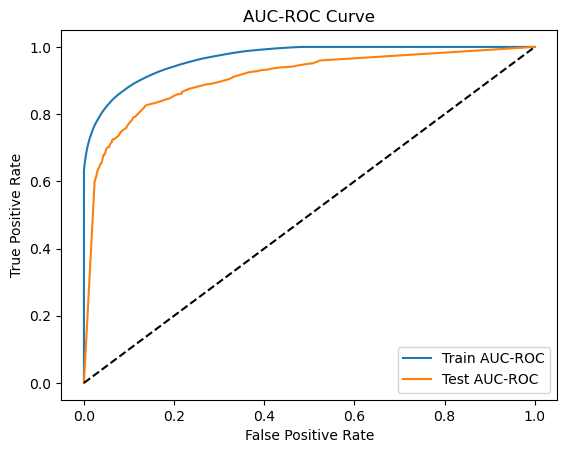

In [90]:
# Calculate the false positive rate and true positive rate for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
# Calculate the false positive rate and true positive rate for the test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
# Plot the AUC-ROC curve for training data
plt.plot(fpr_train, tpr_train, label='Train AUC-ROC')
# Plot the AUC-ROC curve for test data
plt.plot(fpr_test, tpr_test, label='Test AUC-ROC')
# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--')
# Set the x-axis and y-axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Set the title of the plot
plt.title('AUC-ROC Curve')
# Display the legend
plt.legend()
# Show the plot
plt.show()

In [91]:
# feature importance
pd.DataFrame({'features':best_dt_classifier.feature_names_in_, 'importance':best_dt_classifier.feature_importances_})

,features,importance
0,Geography_Germany,0.029925
1,Gender_Male,0.015127
2,CreditScore,0.066497
3,Balance,0.127296
4,NumOfProducts,0.257310
5,IsActiveMember,0.050147
6,Age1,0.453699


# Random Forest

In [120]:

X=X[['Geography_Germany',  'Gender_Male', 'CreditScore',
        'Balance', 'NumOfProducts', 'IsActiveMember',
        'Age1']]
y=y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)

Shape of X_train: (11148, 7)
Shape of y_train: (11148,)
Shape of X_test: (4778, 7)
Shape of y_test: (4778,)


Best Parameters: {'bootstrap': True, 'max_depth': 30, 'n_estimators': 100}

In [135]:
# Define the parameter grid for hyperparameter tuning
param_grid_rf =  {
    'n_estimators': [50, 100],  
    'max_depth': [10,  30],    
    'bootstrap': [True, False] }

# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=10)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict probabilities on the training and test data
y_train_prob_rf = rf_classifier.predict_proba(X_train)[:, 1]
y_test_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the AUC score on the training and test data
train_auc_rf = roc_auc_score(y_train, y_train_prob_rf)
test_auc_rf = roc_auc_score(y_test, y_test_prob_rf)

# Predict the target variable on the training and test data
y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy for train and test sets
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Calculate precision, recall, and F1 score for train set
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)

# Calculate precision, recall, and F1 score for the test set
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

# Calculate confusion matrix for train and test sets
train_confusion_matrix_rf = confusion_matrix(y_train, y_train_pred_rf)
test_confusion_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

# Print the results for Random Forest
print("Random Forest - Train Accuracy:", train_accuracy_rf)
print("Random Forest - Train Precision:", train_precision_rf)
print("Random Forest - Train Recall:", train_recall_rf)
print("Random Forest - Train F1 Score:", train_f1_rf)
print("Random Forest - Train AUC Score:", train_auc_rf)
print("Random Forest - Train Confusion Matrix:")
print(train_confusion_matrix_rf)

print("\nRandom Forest - Test Accuracy:", test_accuracy_rf)
print("Random Forest - Test Precision:", test_precision_rf)
print("Random Forest - Test Recall:", test_recall_rf)
print("Random Forest - Test F1 Score:", test_f1_rf)
print("Random Forest - Test AUC Score:", test_auc_rf)
print("Random Forest - Test Confusion Matrix:")
print(test_confusion_matrix_rf)

# Print the AUC scores
print("Random Forest - Train AUC:", train_auc_rf)
print("Random Forest - Test AUC:", test_auc_rf)


Random Forest - Train Accuracy: 0.9998205956225332
Random Forest - Train Precision: 0.999820788530466
Random Forest - Train Recall: 0.999820788530466
Random Forest - Train F1 Score: 0.999820788530466
Random Forest - Train AUC Score: 0.9999999195350802
Random Forest - Train Confusion Matrix:
[[5567    1]
 [   1 5579]]

Random Forest - Test Accuracy: 0.8606111343658435
Random Forest - Test Precision: 0.8660980810234542
Random Forest - Test Recall: 0.8522870331514897
Random Forest - Test F1 Score: 0.8591370558375635
Random Forest - Test AUC Score: 0.9343541631441219
Random Forest - Test Confusion Matrix:
[[2081  314]
 [ 352 2031]]
Random Forest - Train AUC: 0.9999999195350802
Random Forest - Test AUC: 0.9343541631441219


# Auc -Roc curve

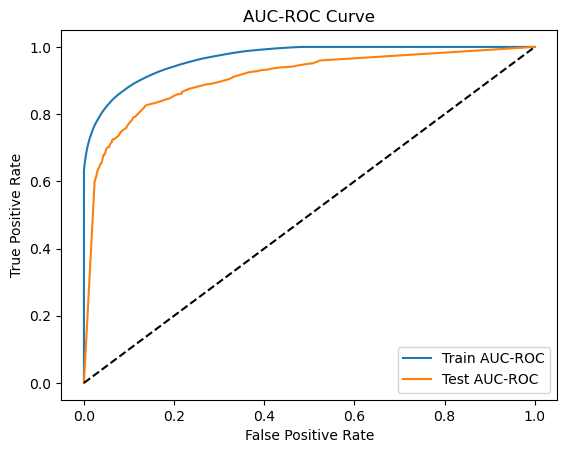

In [138]:
# Calculate the false positive rate and true positive rate for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
# Calculate the false positive rate and true positive rate for the test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
# Plot the AUC-ROC curve for training data
plt.plot(fpr_train, tpr_train, label='Train AUC-ROC')
# Plot the AUC-ROC curve for test data
plt.plot(fpr_test, tpr_test, label='Test AUC-ROC')
# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--')
# Set the x-axis and y-axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Set the title of the plot
plt.title('AUC-ROC Curve')
# Display the legend
plt.legend()
# Show the plot
plt.show()


# Model Performance

In [136]:
data = {'Model': ['Logistic Reg', 'Knn ', 'Decisin Tree','Random Forest'],
        'Test AUC': [auc_test, auc_test_knn, test_auc_dt,test_auc_rf]
        }
df_performace=pd.DataFrame(data)
df_performace

,Model,Test AUC
0,Logistic Reg,0.722476
1,Knn,0.804049
2,Decisin Tree,0.906319
3,Random Forest,0.934354


Our decision Tree model is giving us best results, with AUC of 93%